In [1]:
import xarray as xr
import numpy as np
import pymannkendall as pmk
from matplotlib import cm

In [2]:
Data = xr.open_dataset('cru_ts4.06.1901.2021.tmp.dat.nc')

In [3]:
Data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 1452)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:tmp.2204291209.dtb
    history:      Fri 20 May 20:00:15 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [4]:
Data_2=Data.tmp
Data_2

<xarray.DataArray 'tmp' (time: 1452, lat: 360, lon: 720)>
[376358400 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

(array([2.7215000e+04, 7.2641500e+05, 3.7073590e+06, 5.8495430e+06,
        7.9210320e+06, 1.0387519e+07, 1.5878383e+07, 1.9925544e+07,
        2.9702521e+07, 3.7683090e+06]),
 array([-58.5       , -48.68      , -38.86      , -29.039999  ,
        -19.22      ,  -9.4       ,   0.42000046,  10.240001  ,
         20.060001  ,  29.880001  ,  39.7       ], dtype=float32),
 <BarContainer object of 10 artists>)

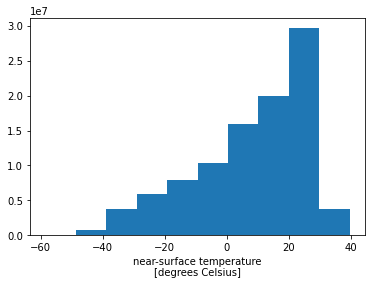

In [5]:
Data_2.plot()

In [6]:
Desmond = Data_2.sel(lon=np.arange(-25,50,0.5),lat=np.arange(0,40,0.5),method='nearest')

In [8]:
Desmond

<xarray.DataArray 'tmp' (time: 1452, lat: 80, lon: 150)>
[17424000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -24.75 -24.25 -23.75 -23.25 ... 48.75 49.25 49.75
  * lat      (lat) float32 0.25 0.75 1.25 1.75 2.25 ... 38.25 38.75 39.25 39.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

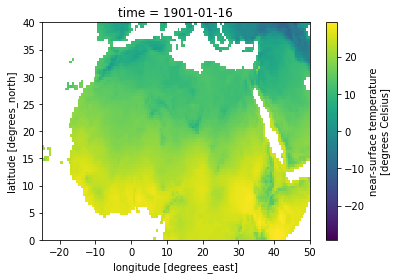

In [10]:
Desmond[0].plot(cmap='viridis')

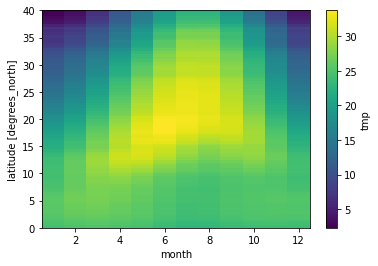

In [12]:
Desmond.groupby('time.month').mean(dim=('time','lon')).T.plot()

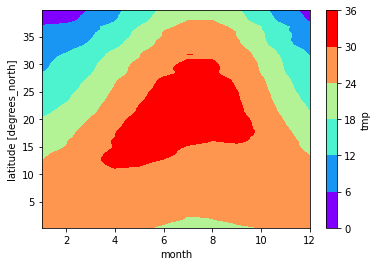

In [15]:
Desmond.groupby('time.month').mean(dim=('time','lon')).T.plot.contourf(cmap='rainbow')